In [6]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [0]:
! tar -xf '/content/gdrive/My Drive/Colab Notebooks/selfie.tar.gz'

In [2]:

import tensorflow as tf
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Activation, Flatten,Input ,concatenate,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
import random
import cv2
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import io
from skimage import util
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from keras import backend as K
import cv2
import os
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

Using TensorFlow backend.


### Vizualization

In [0]:
import pandas as pd

In [0]:
data_frame = pd.read_csv("Selfie-dataset/selfie_dataset.txt",sep=" ")
data_frame.columns = ['image_name','popularity_score','partial_faces','is_female','baby','child','teenager','youth','middle_age','senior','white','black','asian','ovaal_face','round_face','heart_face','smiling','mouth_open','frowning','wearing_glasses','wearing_sunglasses','wearing_lipstick','tongue_out','duck_face','black_hair','blond_hair','brown_hair','red_hair','curly_hair','straight_hair','braid_hair','showing_cellphone','using_earphone','using_mirror','braces','wearing_hat','harsh_lighting','dim_lighting']

In [5]:
good_selfie_df = data_frame[['image_name','is_female','baby','child','teenager','youth','middle_age','senior']]
popularity_score = data_frame['popularity_score']
popularity_score.head()

0    4.385
1    4.243
2    4.169
3    3.873
4    4.458
Name: popularity_score, dtype: float64

In [6]:
good_selfie_df.head(10)

,image_name,is_female,baby,child,teenager,youth,middle_age,senior
0,00cddb96ac4c11e3a30212279ba1b65f_6,1,-1,-1,-1,-1,-1,-1
1,01cdd7aa1a1a11e2aaa822000a1fb0dd_6,1,-1,-1,1,-1,-1,-1
2,024696bead0c11e389d50ec42b3b1b1c_6,-1,-1,-1,1,-1,-1,-1
3,026df048221a11e2b52122000a1fa4b5_6,1,-1,-1,-1,-1,1,-1
4,02b511eed26911e2851d22000a1fb71f_6,1,-1,-1,1,-1,-1,-1
5,02ee8060b02f11e38fe012b1c8928cc9_6,1,-1,-1,1,-1,-1,-1
6,0303318e48cc11e2970f22000a1fbcc2_6,1,-1,-1,-1,1,-1,-1
7,032a49b6bffb11e3b9ca0002c9dbcd18_6,1,-1,-1,1,-1,-1,-1
8,0345a4babff911e395860002c954a07e_6,1,-1,-1,1,-1,-1,-1
9,03d27058678811e394b70a1cf42a31d4_6,1,-1,-1,1,-1,-1,-1


In [7]:
good_selfie_df.tail(10)

,image_name,is_female,baby,child,teenager,youth,middle_age,senior
46825,fcad8c644dce11e2a77f22000a9e29a0_6,1,-1,-1,-1,-1,-1,-1
46826,fd631124be8911e3b0080002c99b89d0_6,1,-1,-1,-1,1,-1,-1
46827,fdabff32b3bd11e3bf01128d86d26cdc_6,1,-1,-1,-1,1,-1,-1
46828,fdf09906b22511e396fe12399c84909d_6,0,-1,-1,-1,-1,-1,-1
46829,fe40cfca3a6611e39fda22000a1f8ae8_6,1,-1,-1,-1,1,-1,-1
46830,fe5ce3cca89311e3873c0e9928917b41_6,1,-1,-1,-1,1,-1,-1
46831,feb38bc4a20711e3bc5f0e4e836c9c84_6,1,-1,-1,-1,-1,-1,-1
46832,fed5374e66d211e3ad1e12ed570e9379_6,-1,-1,-1,-1,-1,-1,-1
46833,ff639554890411e2942122000aaa0535_6,1,-1,-1,-1,-1,-1,-1
46834,ffb33a90b06911e3b2a4120e4e51d427_6,-1,-1,-1,-1,1,-1,-1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84cc8ffa58>,
      dtype=object)

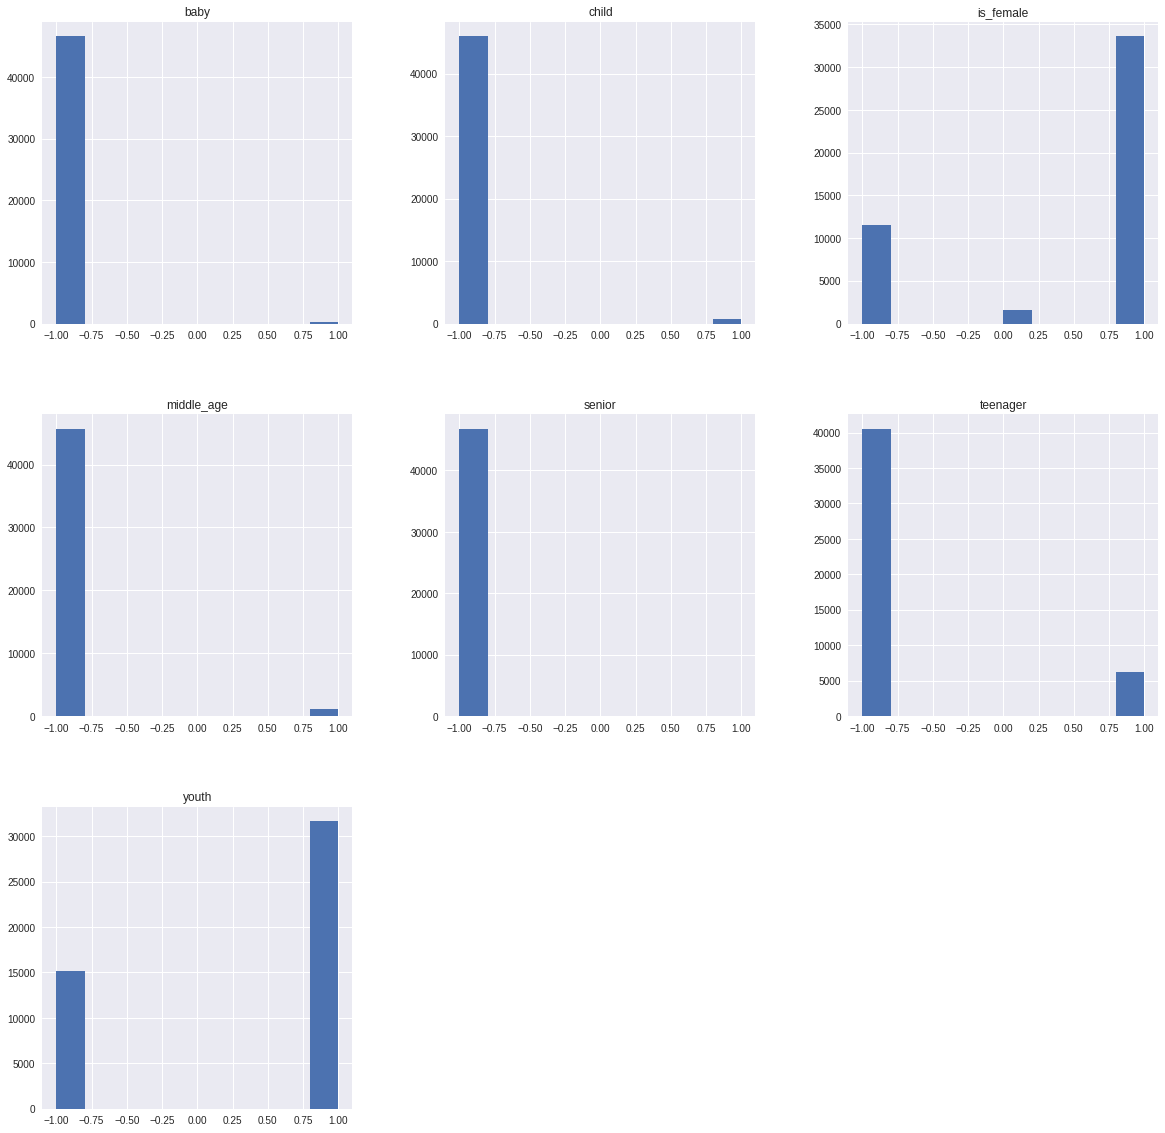

In [8]:
good_selfie_df.hist(figsize=(20,20))  


In [9]:
good_selfie_df.loc[good_selfie_df['baby']== -1, 'baby'] = 0
good_selfie_df.loc[good_selfie_df['teenager']== -1, 'teenager'] = 0
good_selfie_df[good_selfie_df.is_female != 0]
good_selfie_df.loc[good_selfie_df['is_female']== -1, 'is_female'] = 0
good_selfie_df.loc[good_selfie_df['child']== -1, 'child'] = 0
good_selfie_df.loc[good_selfie_df['youth']== -1, 'youth'] = 0
good_selfie_df.loc[good_selfie_df['middle_age']== -1, 'middle_age'] = 0
good_selfie_df.loc[good_selfie_df['senior']== -1, 'senior'] = 0
good_selfie_df.head(10)
good_selfie_df = good_selfie_df[:5000]
popularity_score = popularity_score[:5000]
len(popularity_score)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


5000

### Data Augmentation

In [0]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
   
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img


In [0]:
def augment(image_path, scale,row):
    num_files_desired = scale
    image = mpimg.imread(image_path)
    new_file_path = ("Selfie-dataset/images/")
    for i in range(num_files_desired):
        img = transform_image(image,20,10,5)
        df = row
        img_name = row['image_name']
        df['image_name']=img_name+'_'+str(i)
        good_selfie_df.append(df)
        cv2.imwrite(os.path.join(new_file_path , img_name+'_'+str(i)+'.jpg'), img)

#### Augmenting skewed column

In [0]:
for index, row in good_selfie_df.iterrows():
    if row['baby'] == 1:
        image_id = row['image_name']
        image_path = 'Selfie-dataset/images/'+image_id+'.jpg'
        augment(image_path,100,row) 
    elif row['child'] == 1:
        image_id = row['image_name']
        image_path = 'Selfie-dataset/images/'+image_id+'.jpg'
        augment(image_path,20,row)
    elif row['middle_age'] == 1:
        image_id = row['image_name']
        image_path = 'Selfie-dataset/images/'+image_id+'.jpg'
        augment(image_path,10,row)
    elif row['senior'] == 1:
        image_id = row['image_name']
        image_path = 'Selfie-dataset/images/'+image_id+'.jpg'
        augment(image_path,1000,row)
    elif(row['teenager']==1): 
        image_id = row['image_name']
        image_path = 'Selfie-dataset/images/'+image_id+'.jpg'
        augment(image_path,3,row) 

### Spilt the data

In [0]:
msk = np.random.rand(len(good_selfie_df)) < 0.85
train_df = good_selfie_df[msk]
train_popularity_score_df = popularity_score[msk]
test_df = good_selfie_df[~msk]
test_popularity_score_df = popularity_score[~msk]

In [11]:
print(len(train_df))
print(len(test_df))
print(len(train_popularity_score_df))
print(len(test_popularity_score_df))

4237
763
4237
763


In [12]:
imgs = []
y = []
for index,row in train_df.iterrows():
    file_name = row['image_name']
    y_val = [row['is_female'],row['baby'],row['child'],row['teenager'],row['youth'],row['middle_age'],row['senior']]
    image_path = 'Selfie-dataset/images/'+file_name+'.jpg'
    image = mpimg.imread(image_path)
    x = preprocess_input(image)
    imgs.append(x)
    y.append(y_val)
print(len(y))

4237


In [13]:

imgs_data = np.array(imgs)
print(imgs_data.shape)
y_data = y
popularity_score_train = []
for row in train_popularity_score_df:
  popularity_score_train.append(row)
np_popularity_score_train = np.array(popularity_score_train)
y_train = np.array(y_data)
print(imgs_data.shape,y_train.shape,np_popularity_score_train.shape)

(4237, 306, 306, 3)
(4237, 306, 306, 3) (4237, 7) (4237,)


In [0]:
# new_y = []
# for row,value_array in zip(train_popularity_score_df,y):
#   #new_value_array = [row] + value_array
#   new_value_array = [np.array([row]),np.array(value_array)]
#   new_y.append(new_value_array)
# print(new_y)

In [0]:
imgs = []
y = []
for index, row in test_df.iterrows():
    file_name = row['image_name']
    y_val = [row['is_female'],row['baby'],row['child'],row['teenager'],row['youth'],row['middle_age'],row['senior']]
    image_path = 'Selfie-dataset/images/'+file_name+'.jpg'
    image = mpimg.imread(image_path)
    x = preprocess_input(image)
    imgs.append(x)
    y.append(y_val)
# new_y = []
# for row,value_array in zip(test_popularity_score_df,y):
#   #new_value_array = [row] + value_array
#   new_value_array = [np.array([row]),np.array(value_array)]
#   new_y.append(new_value_array)
# print(new_y)
imgs_test = np.array(imgs)
y_data = y
popularity_score_test = []
for row in test_popularity_score_df:
  popularity_score_test.append(row)
np_popularity_score_test = np.array(popularity_score_test)
y_test = np.array(y_data)

In [0]:
import time

In [0]:
def create_model():
  num_classes = 7
  model = ResNet50(weights='imagenet',include_top=False)
  #model.summary()
  last_layer = model.output
  # add a global spatial average pooling layer
  x = GlobalAveragePooling2D()(last_layer)
  # add fully-connected & dropout layers
  x = Dense(512, activation='relu',name='fc-1')(x)
  x = Dropout(0.5)(x)
  x = Dense(256, activation='relu',name='fc-2')(x)
  x = Dropout(0.5)(x)
  # a softmax layer for 4 classes
  out1 = Dense(num_classes, activation='softmax',name='output_layer_class')(x)
  out2 = Dense(1,name='output_layer_reg')(x)
  # this is the model we will train
  custom_resnet_model2 = Model(inputs=model.input, outputs=[out1,out2])
   #custom_resnet_model2.summary()
  for layer in custom_resnet_model2.layers[:-6]:
    layer.trainable = False
#   custom_resnet_model2.layers[-1].trainable
  return custom_resnet_model2


In [0]:
def multitask_loss(y_true, y_pred):
    # Avoid divide by 0
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
    # Multi-task loss
    return K.mean(K.sum(- y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred), axis=1))

In [0]:
def train():
  custom_resnet_model2 = create_model()
  losses = {
    "output_layer_class": multitask_loss,
    "output_layer_reg": "mean_squared_error",
  }
  lossWeights = {"output_layer_class": 1.0, "output_layer_reg": 1.0}
  custom_resnet_model2.compile(loss=losses,loss_weights=lossWeights,optimizer='adam',metrics={"output_layer_class": "accuracy", "output_layer_reg": "mse"})
  ckpt_model = '/content/gdrive/My Drive/Colab Notebooks/Weights/weights1.best.hdf5'
  checkpoint = ModelCheckpoint(filepath = ckpt_model,
                    monitor='val_acc',
                    verbose=1,
                    save_best_only=True,
                    mode='max')
 
  # fit the model
  t=time.time()
  print(np_popularity_score_train)
  hist = custom_resnet_model2.fit(imgs_data,{"output_layer_class":y_train,"output_layer_reg":np_popularity_score_train},batch_size=32, epochs=15, verbose=1,callbacks=[checkpoint],validation_data=(imgs_test,{"output_layer_class": y_test,"output_layer_reg":np_popularity_score_test}))
  custom_resnet_model2.save_weights(ckpt_model)
  print("Training time: %s" % (t - time.time()))
#   (loss, accuracy) = custom_resnet_model2.evaluate(imgs_test, {"output_layer_class": y_test,"output_layer_reg":np_popularity_score_test}, batch_size=10, verbose=1)
#   print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

In [0]:
custom_resnet_model2 = create_model()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
print(y_train.shape,y_test.shape)

(4262, 7) (738, 7)


In [0]:
def test_model():
  # create the model
  model = create_model()
  # load model weights
  model.load_weights("/content/gdrive/My Drive/Colab Notebooks/Weights/weights1.best.hdf5")
  # predict values
  predicted_values = model.predict(imgs_data)
  return predicted_values

In [0]:
train()


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


[4.385 4.169 3.873 ... 4.451 3.736 3.521]
Train on 4262 samples, validate on 738 samples
Epoch 1/15
4262/4262 [==============================] - 88s 21ms/step - loss: 4.5984 - output_layer_class_loss: 2.6713 - output_layer_reg_loss: 1.9271 - output_layer_class_acc: 0.4815 - output_layer_reg_mean_squared_error: 1.9271 - val_loss: 2.6909 - val_output_layer_class_loss: 2.2558 - val_output_layer_reg_loss: 0.4352 - val_output_layer_class_acc: 0.7615 - val_output_layer_reg_mean_squared_error: 0.4352
Epoch 2/15


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


4262/4262 [==============================] - 78s 18ms/step - loss: 3.5088 - output_layer_class_loss: 2.3419 - output_layer_reg_loss: 1.1669 - output_layer_class_acc: 0.5000 - output_layer_reg_mean_squared_error: 1.1669 - val_loss: 2.8624 - val_output_layer_class_loss: 2.2098 - val_output_layer_reg_loss: 0.6526 - val_output_layer_class_acc: 0.5339 - val_output_layer_reg_mean_squared_error: 0.6526
Epoch 3/15
4262/4262 [==============================] - 78s 18ms/step - loss: 3.2180 - output_layer_class_loss: 2.2710 - output_layer_reg_loss: 0.9470 - output_layer_class_acc: 0.5382 - output_layer_reg_mean_squared_error: 0.9470 - val_loss: 3.5431 - val_output_layer_class_loss: 2.1834 - val_output_layer_reg_loss: 1.3596 - val_output_layer_class_acc: 0.7981 - val_output_layer_reg_mean_squared_error: 1.3596
Epoch 4/15
4262/4262 [==============================] - 78s 18ms/step - loss: 3.1127 - output_layer_class_loss: 2.2334 - output_layer_reg_loss: 0.8792 - output_layer_class_acc: 0.5720 - outpu

In [0]:
def test_model_imgs(test_img):
  # create the model
  model = create_model()
  
  # load model weights
  model.load_weights('/content/gdrive/My Drive/Colab Notebooks/Weights/weights1.best.hdf5')
  # predict values
  imag=[]
  image = mpimg.imread(test_img)
  image=preprocess_input(image)
  print(image.shape)
  imag.append(image)
  predicted_values = model.predict(np.array(imag))
  return predicted_values

In [19]:
pred_values=test_model_imgs('/content/gdrive/My Drive/Colab Notebooks/sel5.jpg')
print(pred_values[0])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


(184, 275, 3)
[[3.6968404e-01 1.6742650e-03 4.7530681e-03 1.6860677e-01 4.4447610e-01
  1.0747613e-02 5.8173799e-05]]


In [20]:
print(pred_values[1])

[[3.2876508]]


In [0]:
predict_values = test_model()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
print(predict_values)
predict_values = np.array(predict_values[0])
print(predict_values.shape)
print(predict_values)

[array([[5.1484537e-01, 2.0615016e-03, 6.8586357e-03, ..., 3.8234028e-01,
        1.3535538e-02, 2.0893176e-04],
       [4.8225763e-01, 1.7023974e-03, 5.5206381e-03, ..., 4.2521074e-01,
        1.2861422e-02, 9.6984681e-05],
       [5.1534587e-01, 9.0649410e-04, 3.7216425e-03, ..., 4.0383902e-01,
        9.2082685e-03, 8.0862839e-05],
       ...,
       [5.2452767e-01, 1.2013789e-03, 4.0924121e-03, ..., 3.9549205e-01,
        9.8038083e-03, 9.6453768e-05],
       [2.9422623e-01, 4.7106831e-03, 1.6346654e-02, ..., 5.3091079e-01,
        3.6367040e-02, 5.4617506e-04],
       [5.3572220e-01, 1.5233915e-03, 4.8580240e-03, ..., 3.7386623e-01,
        1.0308955e-02, 1.8330215e-04]], dtype=float32), array([[4.160149 ],
       [4.4017234],
       [4.3324537],
       ...,
       [4.1900663],
       [3.7712133],
       [4.1194196]], dtype=float32)]
(4262, 7)
[[5.1484537e-01 2.0615016e-03 6.8586357e-03 ... 3.8234028e-01
  1.3535538e-02 2.0893176e-04]
 [4.8225763e-01 1.7023974e-03 5.5206381e-03 ..

In [0]:
train_dataset = []
for row,imgs in zip(predict_values,imgs_data):
  train_vals = []
  train_vals.append(imgs)
  train_vals.append(row)
  train_dataset.append(train_vals)


In [0]:
train_dataset = np.array(train_dataset)
train_dataset.shape

(4262, 2)

In [0]:
def create_model_2():
  num_classes = 7
  model = ResNet50(weights='imagenet',include_top=False)
  output_2 = GlobalAveragePooling2D()(model.output)
  auxiliary_input = Input(shape=(7,), name = "auxiliary_input")
  output_2 = concatenate([output_2, auxiliary_input])
  output_2= BatchNormalization()(output_2)
  output_2 = Dropout(0.2)(output_2)
  output_2= Dense(16, activation='relu')(output_2)
  output_2 = BatchNormalization()(output_2)
  output_2 = Dropout(0.2)(output_2)
  output_2= Dense(16, activation='relu')(output_2)
  output_2 = BatchNormalization()(output_2)
  output_2 = Dropout(0.2)(output_2)
  output_2 = Dense(1,name="regression_output_1")(output_2)
  decay_rate = 0.1 / 12
  #model_final = Model(input = pretrained_model.input, output = output_2)
  model_final = Model(input = [model.input, auxiliary_input], output = output_2)
  return model_final
  

In [0]:
def test_model_2():
  # create the model
  model = create_model_2()
  # load model weights
  model.load_weights("/content/gdrive/My Drive/Colab Notebooks/Weights/weights1.best.hdf5")
  # predict values
  predicted_values = model.predict(np.array(imgs_test))
  return predicted_values

In [0]:
def test_model_FINAL():
  # create the model
  model = create_model()
  # load model weights
  model.load_weights("/content/gdrive/My Drive/Colab Notebooks/Weights/weights1.best.hdf5")
  # predict values
  predicted_values = model.predict(imgs_test)
  return predicted_values

In [0]:
def train():
  #custom_resnet_model3 = create_model()
  predicted_value_test=test_model_FINAL()
  print(predicted_value_test[0].shape)
  custom_resnet_model_4 = create_model_2()
  custom_resnet_model_4.compile(loss = 'mean_squared_error',optimizer=Adam(lr=0.1,decay=0.0), metrics=["mse"])
  custom_resnet_model_4.fit([imgs_data,predict_values],np_popularity_score_train,
                      epochs=15,
                      batch_size=64,
                      validation_data=([imgs_test,predicted_value_test[0]], np_popularity_score_test))
  
#   (loss, accuracy) = custom_resnet_model2.evaluate(imgs_test, {"output_layer_class": y_test,"output_layer_reg":np_popularity_score_test}, batch_size=10, verbose=1)
#   print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

In [0]:
train()